# 2D model: Agent based population interaction model


<div class="alert alert-block alert-success">

In this notebook we provide the code which demonstrates a basic agent based model of two populations interacting with each other. If you recall from the first year course on programming, we built and deployed a version of Conway's game of life where we implemented a set of rules which dictated the state and evolution of a 2D space. In this notebook we again used a 2D space but populate it with two species which, using the class object in Python, allows us to assign and track the individual status of members of each group. We explain this in more detail shortly. As with all practicals given in this module, the model is ready for you to use. In the Exercises however there is an opportunity to modify the existing code basis and quantify any impacts that may have.
    
 - 1) [Introduction to the agent based approach](#Introduction)
 - 2) [Creating rules for our population](#rules)
 - 3) [Animating the simulation](#animating)
 - 4) [Exercises](#Exercises)
 
As with our other notebooks, we will provide you with a template for plotting the results. These practicals are designed for you to take outside of class and continue working on them. 

</div>

## 1) Introduction to the agent based approach<a name="Introduction"></a>



<div>
<img src="..\..\images\Examples-of-Agent-based-modeling.jpg" width="700"/>
</div>


Agent based models, or ABM's, are 'a [class of computational models](https://en.wikipedia.org/wiki/Agent-based_model) for simulating the actions and interactions of autonomous agents (both individual or collective entities such as organizations or groups) with a view to assessing their effects on the system as a whole. As an example,[see the picture above [source Univ Surrey]](https://mosimtec.com/agent-based-modeling-examples/). It combines elements of game theory, complex systems, emergence, computational sociology, multi-agent systems, and evolutionary programming.

How do we implement individual agents? There is a huge amount of literature and existing research around ABMs. In Python we can use the [class object](https://docs.python.org/3/tutorial/classes.html) which allows us to create individual instances with specific traits, whether it be data or action based. Thus, if we start to design individual populations, we can assign individual members of those and act accordingly.

We have not covered the class object in our courses yet, but in the code below we define a class 'agent'. Thus, you will see the following:

```python
# class, defining agents with their position and group membership
class agent:
    def __init__(self,x,y,group):
        self.score = 100 # agent's life score
        self.x = x
        self.y = y
        self.group = group
```
which means when we create an instance of an agent in our simulation, we assign it a position in our 2D space [x and y], and also a group membership. We can store each class instance in a list. We pass x,y and the group letter to each instance. Notice the term ```self```, which has the attributes ```.x``` and so on. We also initialise each instance with a ```score```. This score will depleted according to the action of the other group.

To summarise what we are doing, and as discussed in the lecture. We have two groups with a specific number of members. We call these groups $A$ and $B$. You can appreciate there are many ways we could implement the interaction between both, but by taking a fairly [simple approach](http://www.supplychaindataanalytics.com/category/agent-based-simulation/), here we initialise a 2D space of 100x100 cells, and randomly position members from both groups across this space with an initial fixed number of 600 of each. Once we have assigned those positions we assuem they remain fixed, but then as we loop through each iteration of the space they will interact according to the distance between them.

In this example, we implement the following:

 - Each agent searches their local space, defined as ```attackRange``` units horizontally and vertically from its current location. 
 - Each agent has a randomly distributed attack 'damage' to a member of the other group, ranging from 10 to 60 units extracted from the agent's ```score```.
 - Once a particular agent has a lifescore at or below 0 they are removed from the field.

After we loop through these rules we can asses the impact of a number of initial conditions or strategies imposed on each group. To visualise the location of each agent, we create a 2D numeric space with 0 for no enries, 1 for group $A$ and 2 for group $B$.

Run the following code and you will see an initial distribution of agents belonging to groups $A$ and $B$. 


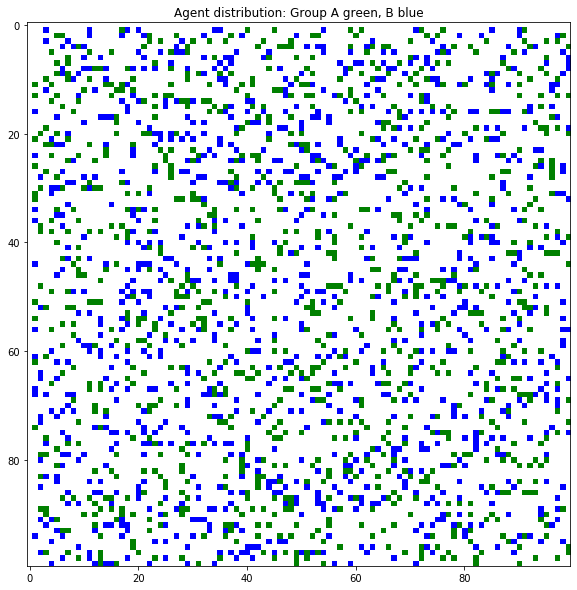

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
from numpy import random
from matplotlib import colors
from IPython.display import clear_output, display
import pdb
import random
import numpy as np

# class, defining agents with their position and group membership
class agent:
    def __init__(self,x,y,group):
        self.score = 100 # agent's life score
        self.x = x
        self.y = y
        self.group = group
        
# define a function for creating agents and assigning them to grid
def agentCreator(size,group,groupList,field,n,m):
    # loop through entire group
    for j in range(0,size):
        # select random available location 
        while True:
            # random x coordinate
            x = random.choice(range(0,n))
            # random y coordinate
            y = random.choice(range(0,m))
            # check if spot is available; if not then re-iterate 
            if field[x][y] == None:
                field[x][y] = agent(x=x,y=y,group=group)
                # append agent object reference to group list
                groupList.append(field[x][y])
                # exit while loop; spot on field is taken
                break

# function for creating an initial grid
def initfield(populationSizeA,populationSizeB):
    # initializing new empty grid, using list comprehension in Python
    field_grid = [[None for i in range(0,100)] for i in range(0,100)]
    # create empty list for containing agent references in future, type A & B
    agents_A = []
    agents_B = []
    # assigning random spots to agents of group A and B; 
    agentCreator(size = populationSizeA,
                    group = "A",
                    groupList = agents_A,
                    field = field_grid,
                    n = 100,
                    m = 100)
    agentCreator(size = populationSizeB,
                    group = "B",
                    groupList = agents_B,
                    field = field_grid,
                    n = 100,
                    m = 100)
    # return populated grid and a list of agents in groups A and B
    return field_grid, agents_A, agents_B

# executing above function for a population size of 1000 for both groups
field, agents_A, agents_B = initfield(populationSizeA=1000,populationSizeB=1000)

# Now lets plot the 2D space and see what our initial condition looks like
def mapfield(field):
    #.imshow() needs a matrix with float elements;
    population = [[0.0 for i in range(0,100)] for i in range(0,100)]
    # if agent is of type A, put a 1.0, if of type B, pyt a 2.0
    for i in range(1,100):
        for j in range(1,100):
            if field[i][j] == None: # empty
                pass # leave 0.0 in population cell
            elif field[i][j].group == "A": # group A agents
                population[i][j] = 1.0 # 1.0 means "A"
            else: # group B agents
                population[i][j] = 2.0 # 2.0 means "B"
    # return mapped values
    return population

population_grid = mapfield(field)

colormap = colors.ListedColormap(["white","green","blue"])

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(population_grid, cmap=colormap)
plt.title('Agent distribution: Group A green, B blue')
plt.show()


## 2) Creating rules for our population<a name="rules"></a>

We have already discussed what strategies we wish to implement in each group and how they are removed from the 2D space. In the following code snippet we create three functions that implement that removal. We have created one function for both species $A$ and $B$, and one for checking the score variable of each agent and remove it from the 2D space if this drops below 0.


In [10]:
# function for removing agents from battlefield grid when life score is not strictly positive
def removeAgents(field):
    # identifying agents with life score of score or below - and removing them from the grid
    for i in range(0,len(field)):
        for j in range(0,len(field)):
            if field[i][j]:
                if field[i][j].score <= 0:
                    # remove this agent since life score is not strictly positive
                    field[i][j] = None
        
# function implementing one round of interaction, for an agent of type A
def oneRoundAgentA(i,j,attackRange):
    found_i = None
    found_j = None
    # look in neigbouring cells in same order for each iteration
    for k in range(i-attackRange,i+attackRange+1):
        for l in range(j-attackRange,j+attackRange+1):
            # check for negative index values; if so - break!
            if k < 0 or l < 0:
                break
                # check for index values above 99, if so break!
            if k > 99 or l > 99:
                break
            if field[k][l]:
                if field[k][l].group == "B": # then this is an enemy
                    if found_i == None:
                        found_i = k
                        found_j = l
                    
    # deal damage to identified specie
    if found_i != None:
        field[found_i][found_j].score = field[found_i][found_j].score - random.randint(10,60)
        
# function implementing one round of interaction, for an agent of type B
def oneRoundAgentB(i,j,attackRange):
    found_i = None
    found_j = None
    # look in neigbouring cells in same order for each iteration
    
    # In B's case we look randomly through the surrounding space
    list1 = [k for k in range(i-attackRange,i+attackRange+1)]
    list2 = [l for l in range(j-attackRange,j+attackRange+1)]
    random.shuffle(list1)
    random.shuffle(list2)
    for k in list1:
        for l in list2:
            # check for negative index values; if so - break!
            if k < 0 or l < 0:
                break
                # check for index values above 99, if so break!
            if k > 99 or l > 99:
                break
            if field[k][l]:
                if field[k][l].group == "A": # then this is an enemy
                    if found_i == None:
                        found_i = k
                        found_j = l
    # deal damage to identified species
    if found_i != None:
        field[found_i][found_j].score = field[found_i][found_j].score - random.randint(10,60)

## 3) Animating the simulation<a name="animating"></a>

In the following code snippet we now iterate across our space, find where an agent is and then implement the different strategies according to which group they belong. Like our other notebooks, since we are cycling through a series of time steps we can create a simple animation of how our space evolves. In the first code snippet we generate results and store them as a 3D array of states. Im using the word state here to reflect that we are storing the change in status of each agent according to their score. Following this, you will be able to run a simple simulation.

In [11]:
import time

#fig, ax = plt.subplots(figsize=(10,10))
#ax.imshow(population_grid, cmap=colormap)
#plt.title('Agent distribution: Group A green, B blue')
#plt.show()

record_field = np.zeros((100,100,50),dtype=float)

for counter in range(0,50): # in this case I am conducting 50 iterations 
     
    #plt.clf()
    #display(plt.gcf())
    #clear_output(wait=True)
    
    #print(counter)
    # iterating through all cells on the battlefield
    for x in range(0,100):
        for y in range(0,100):
            # print("top tier iteration, i: "+str(i)+", j: "+str(j))
            # check if there is an agent within the respective cell
            if field[x][y] != None:
                # depending on the type: execute respective attack strategy
                if field[x][y].group == "A":
                    # one round of battle for this agent of type A
                    oneRoundAgentA2(i = x, j = y,attackRange=10)
                else: 
                    # one round of battle for this agent of type B
                    oneRoundAgentB(i = x, j = y,attackRange=10)
    # identifying agents with life score of score or below - and removing them from the grid
    removeAgents(field)
    population_grid = mapfield(field)
    record_field[:,:,counter] = population_grid
    #ax.imshow(population_grid, cmap=colormap)
    #plt.show()
    #time.sleep(1);


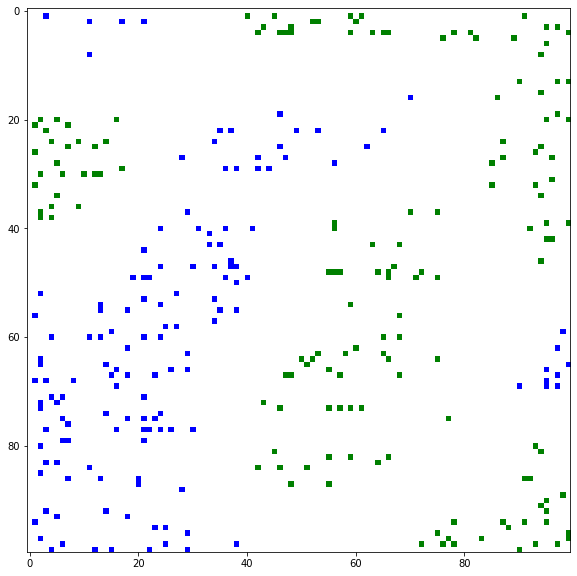

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(record_field[:,:,0], cmap=colormap)
plt.title('Agent distribution: Group A green, B blue')
plt.show()

for counter in range(0,50):
    plt.rcParams["figure.figsize"] = (10, 10)
    #display(plt.gcf())
    clear_output(wait=True)
    plt.imshow(record_field[:,:,counter], cmap=colormap)
    plt.show();
    time.sleep(0.05);
    

## 4) Evaluating the change in species populations

Whilst the above visulisation is a good indicator about the impacts of the implemented strategy and initial conditions, we may want to simply plot the change in the number of species as a function of time.

The following code simply counts how any $A$ and $B$ species there are and then plots them as a function of 'time', time being defined as steps between each simulation.

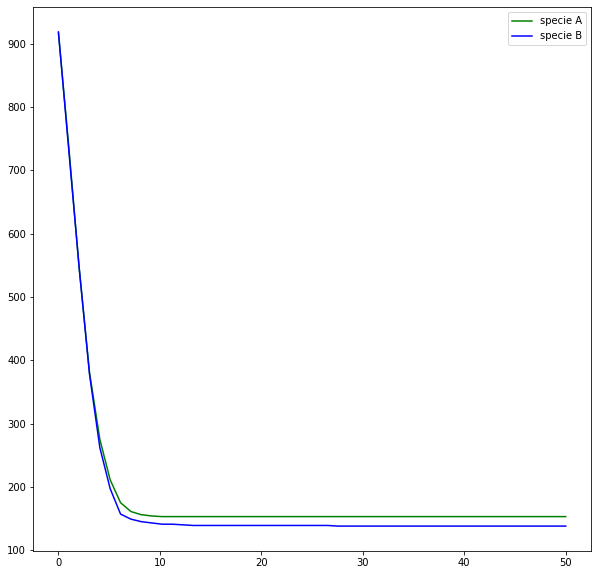

In [13]:
A_list = np.zeros((50), dtype=int)
B_list = np.zeros((50), dtype=int)
time_array = np.linspace(0.0, 50.0, num=50)

for counter in range(0,50):
    A_list[counter]=np.count_nonzero(record_field[:,:,counter] == 1)
    B_list[counter]=np.count_nonzero(record_field[:,:,counter] == 2)
    
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(time_array, A_list, 'g', label='specie A',linewidth=2)
plt.plot(time_array, B_list, 'b', label='specie B',linewidth=2)
plt.xlabel('time', fontsize=12)
plt.ylabel('species concentration', fontsize=16)
plt.legend()
plt.show()


<div class="alert alert-block alert-success">
<b> Exercises </b> <a name="Exercises"></a>

In this notebook, try to work through the following tasks:

1. - In our first example we see the final numbers of group $B$ are much higher than those of $A$. If you reduced the initial number in group $B$ to 600, what impact does this have? You will need to change the code to reflect this change. Specifically, if you find the following area in the first code block:

```python
field, agents_A, agents_B = initfield(populationSizeA=1000,populationSizeB=1000)
```

And change the value for 'populationSizeB'. Bare in mind we randomly distribute the location of different species, but do you results now show a similar trend? Are absolute numbers the best metric to use to infer impact?
    
    
2. - Change the strategy of group $A$ to match group $B$.
    Re-initialise the simulation so that both $A$ and $B$ have 1000 agents. Now change the strategy of $A$ to match that of $B$. What happens to our total concentrations over time now? You will need to introduce a slight change to the code in our notebook. Specifically, please change the function for group $A$ as follows:

```python
def oneRoundAgentA(i,j,attackRange):
    found_i = None
    found_j = None
    # look in neigbouring cells in same order for each iteration
    
    list1 = [k for k in range(i-attackRange,i+attackRange+1)]
    list2 = [l for l in range(j-attackRange,j+attackRange+1)]
    random.shuffle(list1)
    random.shuffle(list2)
    for k in list1:
        for l in list2:
            # check for negative index values; if so - break!
            if k < 0 or l < 0:
                break
                # check for index values above 99, if so break!
            if k > 99 or l > 99:
                break
            if field[k][l]:
                if field[k][l].group == "B": # then this is an enemy
                    if found_i == None:
                        found_i = k
                        found_j = l
                    
    # deal damage to identified specie
    if found_i != None:
        field[found_i][found_j].score = field[found_i][found_j].score - random.randint(10,60)
```

Before we finish, if you now drop the number of agents in $B$ again to 600 do you see a similar trend?


</div>